# PHẦN ĐẦU

## Phần 1 - Phân tích và mô tả dữ liệu

**Thông tin tổng quan về bộ dữ liệu Titanic**

*   **Nguồn**: Cuộc thi "Titanic: Machine Learning from Disaster" trên Kaggle.
*   **Mục tiêu**: Dự đoán khả năng **sống sót** của hành khách trên tàu Titanic dựa trên các đặc trưng cá nhân.
*   **Biến mục tiêu**: `Survived` (1 = sống sót, 0 = không sống sót).

***

**Input (Đầu vào)**

Là các đặc trưng (features) mô tả hành khách, bao gồm:

| Cột           | Mô tả                                                         |
| ------------- | ------------------------------------------------------------- |
| `PassengerId` | ID hành khách                                                 |
| `Survived`    | Biến mục tiêu (0 = không sống sót, 1 = sống sót)              |
| `Pclass`      | Hạng vé (1 = cao cấp, 2 = trung bình, 3 = phổ thông)          |
| `Name`        | Tên hành khách                                                |
| `Sex`         | Giới tính                                                     |
| `Age`         | Tuổi                                                          |
| `SibSp`       | Số anh chị em/vợ chồng đi cùng                                |
| `Parch`       | Số cha mẹ/con cái đi cùng                                     |
| `Ticket`      | Mã vé                                                         |
| `Fare`        | Giá vé                                                        |
| `Cabin`       | Số cabin                                                      |
| `Embarked`    | Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton) |

***

 **Output (Đầu ra)**

*   **`Survived`**: Biến mục tiêu (target variable)
    *   `0`: Không sống sót
    *   `1`: Sống sót

***

 **Ứng dụng phân tích**

*   Khám phá dữ liệu: phân phối tuổi, giới tính, hạng vé...
*   Trực quan hóa mối quan hệ giữa các đặc trưng và khả năng sống sót.
*   Huấn luyện mô hình phân loại như **Decision Tree**, **Random Forest**, **Logistic Regression** để dự đoán sống sót.

### 1. Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Thiết lập style cho biểu đồ
plt.style.use('default')
sns.set_palette("husl")

**Giải thích:**
- on='PassengerId': Gộp theo cột chung là PassengerId.
- how='inner': Chỉ giữ lại những dòng có PassengerId xuất hiện ở cả hai bảng (bạn cũng có thể dùng left, right, hoặc outer tùy mục đích).

### 2. Đọc dữ liệu

In [5]:
# Load dữ liệu gốc
file_path = "/kaggle/input/titanic/train.csv"
titanic_full = pd.read_csv(file_path)
print(f" Kích thước dữ liệu đầy đủ: {titanic_full.shape}")
print(titanic_full.head(10))

 Kích thước dữ liệu đầy đủ: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                         

**Nhận xét:**

1.  **Kích thước Dữ liệu:**
    * Dữ liệu đầy đủ có **891 hàng** (hành khách) và **12 cột** (đặc trưng).

2.  **Chất lượng Dữ liệu ban đầu (Quan sát giá trị thiếu):**
    * **Giá trị thiếu (NaN)**: Qua 10 dòng đầu, có thể thấy rõ ràng một số cột bị thiếu dữ liệu (`NaN`), đặc biệt là:
        * **`Age`**: Ví dụ, hành khách có `PassengerId = 6` có giá trị `NaN` ở cột `Age`.
        * **`Cabin`**: Hầu hết các hàng (ví dụ: `PassengerId` 1, 3, 5, 6, 8, 9) đều có giá trị `NaN` trong cột `Cabin`.

3.  **Nhận dạng Biến:**
    * **Biến Mục tiêu (`Survived`):** Là biến nhị phân (0 hoặc 1), cần được phân tích kỹ về sự phân bố.
    * **Các Biến Quan trọng khác:** `Pclass` (Hạng vé), `Sex` (Giới tính), và `Age` (Tuổi) đã được hiển thị, xác nhận chúng là các đặc trưng chính.

**Kết luận:** Dữ liệu đã được tải thành công nhưng **cần xử lý giá trị thiếu** ở các cột `Age` và `Cabin` trước khi tiến hành phân tích sâu hơn.

### 3. Khám phá dữ liệu

In [6]:
# Các cột dữ liệu
print(titanic_full.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


**Nhận xét:** 

Danh sách 12 cột này đại diện cho các đặc trưng (features) mô tả từng hành khách, nhằm mục đích dự đoán khả năng sống sót của họ. Các cột có thể được phân loại như sau:

| Nhóm Cột | Các Cột | Vai trò và Nhận xét |
| :--- | :--- | :--- |
| **Biến Mục Tiêu (Target)** | **`Survived`** | Đây là biến cần dự đoán (0 = Không sống sót, 1 = Sống sót). |
| **Định danh (Identifier)** | **`PassengerId`**, **`Ticket`** | Dùng để định danh hành khách và mã vé. Ít có giá trị dự đoán trực tiếp, thường được loại bỏ hoặc dùng làm chỉ mục. |
| **Phân loại (Categorical)** | **`Pclass`**, **`Sex`**, **`Embarked`**, **`Cabin`**, **`Name`** | Các biến quan trọng nhất. `Sex` và `Pclass` (Hạng vé) thường có mối quan hệ mạnh mẽ với `Survived`. Cột `Cabin` và `Name` cần được xử lý kỹ thuật (feature engineering) để trích xuất thông tin hữu ích (ví dụ: Chức danh từ `Name`, việc có/không có cabin từ `Cabin`). |
| **Định lượng (Numerical)** | **`Age`**, **`Fare`**, **`SibSp`**, **`Parch`** | Các biến số. `Age` là một biến quan trọng nhưng thường bị thiếu giá trị. `SibSp` (Anh chị em/Vợ chồng) và `Parch` (Cha mẹ/Con cái) thường được kết hợp để tạo ra đặc trưng về **Kích thước Gia đình (`FamilySize`)**.


In [7]:
print(titanic_full.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Nhận xét Kiểu Dữ Liệu**

Bảng dữ liệu có **12 cột** với sự phân bố kiểu dữ liệu đa dạng, yêu cầu các bước tiền xử lý khác nhau cho việc xây dựng mô hình máy học:

| Cột | Kiểu Dữ Liệu | Loại Dữ Liệu | Nhận xét và Yêu cầu Xử lý |
| :--- | :--- | :--- | :--- |
| **`Survived`** | `int64` | **Biến Mục Tiêu (Target)** | Đúng định dạng cho bài toán phân loại nhị phân (0 hoặc 1). |
| **`Age`**, **`Fare`** | `float64` | **Định Lượng (Numerical)** | `float64` là phù hợp. Kiểu float cho `Age` cũng xác nhận khả năng cột này chứa **giá trị thiếu (NaN)**, cần được xử lý (điền giá trị). |
| **`Pclass`**, **`SibSp`**, **`Parch`** | `int64` | **Định Lượng/Phân loại Thứ tự (Ordinal)** | Đúng định dạng. `Pclass` là phân loại thứ tự; `SibSp` và `Parch` là các biến đếm, thường dùng để tạo feature mới (`FamilySize`). |
| **`Name`**, **`Sex`**, **`Ticket`**, **`Cabin`**, **`Embarked`** | `object` | **Phân Loại (Categorical/Text)** | Các cột này **cần được mã hóa** (encoding) sang định dạng số (`int` hoặc `float`) trước khi đưa vào mô hình. Đặc biệt, `Name` và `Cabin` cần được xử lý kỹ thuật (feature engineering) để trích xuất thông tin hữu ích (ví dụ: Chức danh, `Has_Cabin`).

In [8]:
# Tạo bản sao để không ảnh hưởng dữ liệu gốc
df = titanic_full.copy()
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [9]:
print("THÔNG TIN TỔNG QUAN:")
print(f"Số hàng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")
print(f"Các cột: {list(df.columns)}")

print("THÔNG TIN CÁC CỘT:")
print(df.columns.tolist())

THÔNG TIN TỔNG QUAN:
Số hàng: 891
Số cột: 12
Các cột: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
THÔNG TIN CÁC CỘT:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### 4. Phân tích chất lượng dữ liệu

In [10]:
# Kiểm tra giá trị thiếu
print("GIÁ TRỊ THIẾU:")
missing_data = df.isnull().sum()
print(missing_data)

GIÁ TRỊ THIẾU:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Kiểm tra giá trị trùng lặp trong PassengerId
print("KIỂM TRA GIÁ TRỊ TRÙNG LẶP - PassengerId:")
duplicate_ids = df['PassengerId'].duplicated().sum()
print(f"Số PassengerId trùng lặp: {duplicate_ids}")

KIỂM TRA GIÁ TRỊ TRÙNG LẶP - PassengerId:
Số PassengerId trùng lặp: 0


In [12]:
# Kiểm tra giá trị duy nhất trong cột Survived
print("GIÁ TRỊ DUY NHẤT TRONG CỘT Survived:")
unique_survived = df['Survived'].unique()
print(f"Các giá trị duy nhất: {sorted(unique_survived)}")

GIÁ TRỊ DUY NHẤT TRONG CỘT Survived:
Các giá trị duy nhất: [0, 1]


### 5. Thống kê mô tả

In [13]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**Nhận xét:**

Kết quả này cung cấp cái nhìn sâu sắc về phân phối và chất lượng của các đặc trưng định lượng trong tập dữ liệu:

| Cột | Phân tích Thống kê | Nhận xét |
| :--- | :--- | :--- |
| **`count`** | `Age` chỉ có **714** giá trị (thiếu 177 giá trị) so với tổng số 891 hàng. | Xác nhận cột **`Age`** là cột số duy nhất có **giá trị thiếu** đáng kể, cần xử lý. |
| **`Survived`** | Giá trị trung bình (**mean**) là **0.3838** (hay **$38.38\%$**). | Cho thấy chỉ **$38.38\%$** hành khách trong tập dữ liệu huấn luyện sống sót, khẳng định vấn đề **mất cân bằng nhẹ** trong biến mục tiêu. |
| **`Pclass`** | Trung bình là **2.31**, giá trị trung vị (**50%**) là **3.0**. | Hầu hết hành khách thuộc **Hạng vé Phổ thông (Pclass=3)**, đây là nhóm đông nhất trên tàu. |
| **`Age`** | Tuổi trung bình (**mean**) là **29.7**. Độ lệch chuẩn (**std**) là **14.53**. | Tuổi có phân phối rộng. Giá trị nhỏ nhất (**min**) là **0.42** (trẻ sơ sinh), xác nhận trẻ em có mặt trên tàu. |
| **`SibSp`** & **`Parch`** | Giá trị trung vị (**50%**) của cả hai cột là **0.0**. | **Hầu hết hành khách đi một mình** hoặc không có anh chị em/vợ chồng (`SibSp=0`) và không có cha mẹ/con cái (`Parch=0`). |
| **`Fare`** | Trung bình (**mean**) là **32.20**. Độ lệch chuẩn (**std**) là **49.69**. | Độ lệch chuẩn cao hơn nhiều so với giá trị trung bình, cho thấy **phân phối giá vé bị lệch (skewed)**. Giá trị **max** là **512.33** (giá vé rất đắt), gợi ý sự tồn tại của **giá trị ngoại lai (outliers)**. |

**Tóm tắt:**

* Dữ liệu **`Age`** là cột số chính cần xử lý thiếu giá trị.
* Biến mục tiêu **`Survived`** có tỷ lệ sống sót dưới $40\%$.
* Các cột **`Pclass`** và **`Fare`** cho thấy sự chênh lệch lớn về điều kiện kinh tế của hành khách, với đa số là hạng vé thấp.
* Cột **`Fare`** bị **lệch** và có giá trị ngoại lai, điều này có thể ảnh hưởng đến một số mô hình và cần được xem xét chuẩn hóa.

In [14]:
survival_counts = df['Survived'].value_counts()
survival_percentages = df['Survived'].value_counts(normalize=True) * 100

print("PHÂN BỐ DỰ ĐOÁN:")
print(f"Số hành khách được dự đoán SỐNG SÓT (1): {survival_counts[1]}")
print(f"Số hành khách được dự đoán KHÔNG SỐNG SÓT (0): {survival_counts[0]}")

PHÂN BỐ DỰ ĐOÁN:
Số hành khách được dự đoán SỐNG SÓT (1): 342
Số hành khách được dự đoán KHÔNG SỐNG SÓT (0): 549


**Nhận xét:**

| Tình trạng | Số lượng hành khách | Tỷ lệ (Tính toán từ notebook) |
| :--- | :--- | :--- |
| **Sống sót (1)** | 342 | **$38.38\%$** |
| **Không sống sót (0)** | 549 | **$61.62\%$** |
| **Tổng cộng** | 891 | $100\%$ |

---

* **Mất cân bằng nhẹ:** Số lượng hành khách **Không sống sót (549)** lớn hơn đáng kể so với nhóm **Sống sót (342)**. Tỷ lệ mất cân bằng là **$1.61:1$** (Không sống sót/Sống sót).
* **Ý nghĩa mô hình hóa:** Mặc dù tồn tại sự mất cân bằng, tỷ lệ $1.61:1$ chưa được coi là nghiêm trọng. Các mô hình phân loại cơ bản như Decision Tree và Random Forest thường vẫn hoạt động tốt mà không cần các kỹ thuật cân bằng dữ liệu phức tạp (như SMOTE hay undersampling).
* **Cần chú ý:** Khi đánh giá mô hình, cần sử dụng các chỉ số nhạy cảm với sự mất cân bằng như **F1-score**, **Precision**, **Recall**, và **AUC** thay vì chỉ dựa vào **Accuracy** thuần túy.

In [15]:
print("TỶ LỆ PHẦN TRĂM:")
print(f"Tỷ lệ SỐNG SÓT: {survival_percentages[1]:.2f}%")
print(f"Tỷ lệ KHÔNG SỐNG SÓT: {survival_percentages[0]:.2f}%")

TỶ LỆ PHẦN TRĂM:
Tỷ lệ SỐNG SÓT: 38.38%
Tỷ lệ KHÔNG SỐNG SÓT: 61.62%


In [16]:
# Tính tỷ lệ mất cân bằng
imbalance_ratio = survival_counts[0] / survival_counts[1]
print(f"TỶ LỆ MẤT CÂN BẰNG (0/1): {imbalance_ratio:.2f}:1")

TỶ LỆ MẤT CÂN BẰNG (0/1): 1.61:1


Tỉ lệ mất cân bằng (Imbalance Ratio) là một cách đơn giản để đánh giá mức độ chênh lệch về số lượng giữa lớp đa số (majority class) và lớp thiểu số (minority class) trong bài toán phân loại.

**Cách Tính Tỉ Lệ Mất Cân Bằng**

Tỉ lệ này được tính bằng công thức:

$$
\text{Tỉ lệ Mất cân bằng} = \frac{\text{Số lượng mẫu của Lớp Đa số}}{\text{Số lượng mẫu của Lớp Thiểu số}}
$$

* **Lớp Đa số (Majority Class):** Là lớp có số lượng mẫu lớn hơn.
* **Lớp Thiểu số (Minority Class):** Là lớp có số lượng mẫu nhỏ hơn (thường là lớp mục tiêu quan trọng cần dự đoán, ví dụ: "sống sót" hoặc "gian lận").

---

** Ví dụ trong Bộ Dữ liệu Titanic**

Trong phân tích dữ liệu Titanic, biến mục tiêu là `Survived` (Sống sót):

1.  **Xác định Lớp:**
    * Lớp Đa số (Không sống sót = 0): **549** hành khách.
    * Lớp Thiểu số (Sống sót = 1): **342** hành khách.

2.  **Tính Tỉ lệ:**

$$
\text{Tỉ lệ Mất cân bằng} = \frac{549}{342} \approx 1.605:1
$$

**Kết quả:** Tỉ lệ mất cân bằng là **$1.61:1$**. Điều này có nghĩa là cứ **$1$** hành khách Sống sót thì có khoảng **$1.61$** hành khách Không sống sót.

### 6. Trực quan hóa dữ liệu

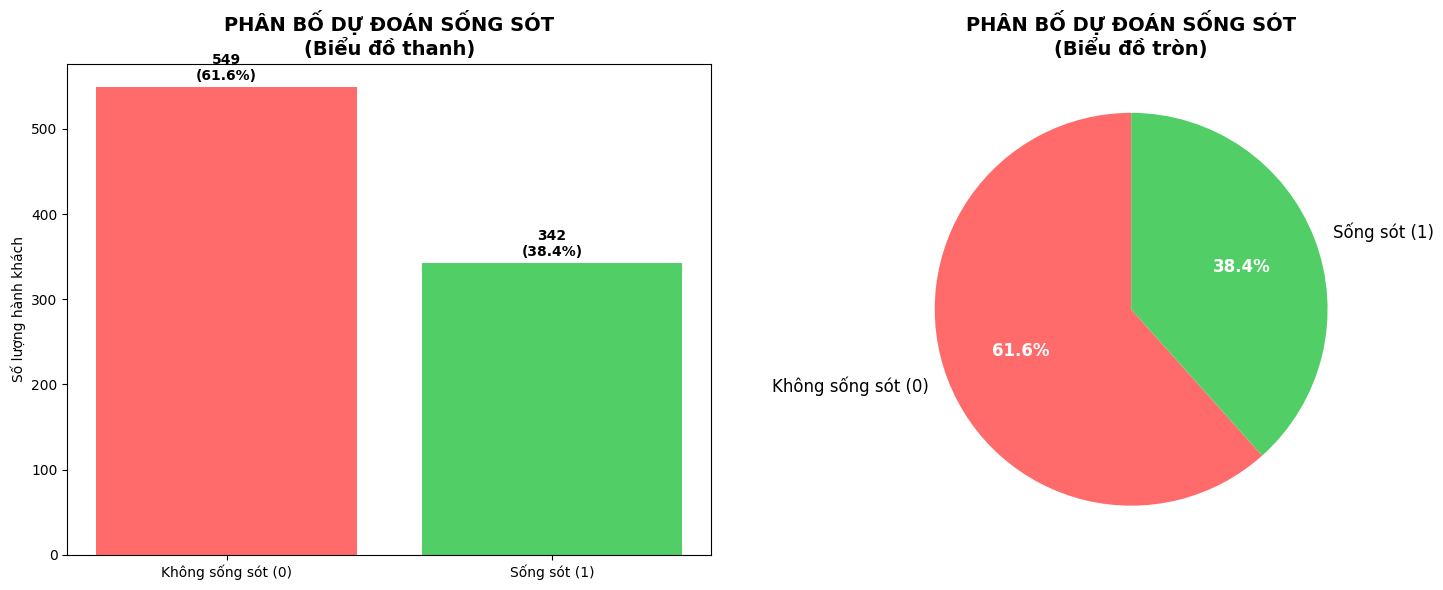

In [17]:
# Tạo subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

bars = axes[0].bar(['Không sống sót (0)', 'Sống sót (1)'], 
                   survival_counts.values, 
                   color=['#ff6b6b', '#51cf66'])
axes[0].set_title('PHÂN BỐ DỰ ĐOÁN SỐNG SÓT\n(Biểu đồ thanh)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Số lượng hành khách')

# Thêm số liệu lên biểu đồ thanh
for bar, count in zip(bars, survival_counts.values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count}\n({count/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontweight='bold')

colors = ['#ff6b6b', '#51cf66']
wedges, texts, autotexts = axes[1].pie(survival_counts.values, 
                                      labels=['Không sống sót (0)', 'Sống sót (1)'],
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90,
                                      textprops={'fontsize': 12})
axes[1].set_title('PHÂN BỐ DỰ ĐOÁN SỐNG SÓT\n(Biểu đồ tròn)', fontsize=14, fontweight='bold')

# Làm đậm phần trăm
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

**Nhận xét: Biểu Đồ Phân Bố Dự Đoán Sống Sót**

Biểu đồ này trực quan hóa phân bố của biến mục tiêu (`Survived`) trong tập dữ liệu (891 hành khách):

| Tình trạng | Số lượng | Tỷ lệ phần trăm |
| :--- | :--- | :--- |
| **Không sống sót (0)** | **549** | **$61.6\%$** |
| **Sống sót (1)** | **342** | **$38.4\%$** |

---

* **Sự Thống Trị của Nhóm Không Sống Sót:** Nhóm **Không sống sót** chiếm đa số với 549 người, tương đương **$61.6\%$** tổng số hành khách.
* **Tỷ lệ Sống Sót Thấp:** Chỉ có 342 người sống sót, chiếm khoảng **$38.4\%$**.
* **Mất Cân Bằng Dữ Liệu:** Biểu đồ cho thấy rõ ràng sự **mất cân bằng nhẹ** trong phân bố lớp (tỷ lệ xấp xỉ $1.61:1$).
* **Ý nghĩa:** Trong quá trình huấn luyện mô hình, kết quả dự đoán ban đầu có xu hướng **thiên vị** (bias) về lớp đa số (Không sống sót). Do đó, cần lưu ý sử dụng các chỉ số đánh giá cân bằng hơn như **F1-score** và **AUC** thay vì chỉ dựa vào độ chính xác (Accuracy) để đo lường hiệu suất thực tế của mô hình.

### 7. Phân tích chi tiết

In [18]:
# Danh sách hành khách sống sót và không sống sót
survived_passengers = df[df['Survived'] == 1]['PassengerId'].tolist()
not_survived_passengers = df[df['Survived'] == 0]['PassengerId'].tolist()

print("10 HÀNH KHÁCH ĐẦU TIÊN ĐƯỢC DỰ ĐOÁN SỐNG SÓT:")
print(f"PassengerId: {survived_passengers[:10]}")
print(f"Tổng số: {len(survived_passengers)} hành khách")


10 HÀNH KHÁCH ĐẦU TIÊN ĐƯỢC DỰ ĐOÁN SỐNG SÓT:
PassengerId: [2, 3, 4, 9, 10, 11, 12, 16, 18, 20]
Tổng số: 342 hành khách


In [19]:
print("10 HÀNH KHÁCH ĐẦU TIÊN ĐƯỢC DỰ ĐOÁN KHÔNG SỐNG SÓT:")
print(f"PassengerId: {not_survived_passengers[:10]}")
print(f"Tổng số: {len(not_survived_passengers)} hành khách")

10 HÀNH KHÁCH ĐẦU TIÊN ĐƯỢC DỰ ĐOÁN KHÔNG SỐNG SÓT:
PassengerId: [1, 5, 6, 7, 8, 13, 14, 15, 17, 19]
Tổng số: 549 hành khách


### 8. Tạo bảng tóm tắt

In [20]:
summary_data = {
    'Chỉ số': [
        'Tổng số hành khách',
        'Số cột',
        'Giá trị thiếu',
        'Sống sót (1) - Số lượng',
        'Sống sót (1) - Tỷ lệ',
        'Không sống sót (0) - Số lượng', 
        'Không sống sót (0) - Tỷ lệ',
        'Tỷ lệ mất cân bằng (0/1)',
        'PassengerId trùng lặp',
        'Giá trị ngoại lai trong Survived'
    ],
    'Giá trị': [
        df.shape[0],
        df.shape[1],
        '0',
        f"{survival_counts[1]}",
        f"{survival_percentages[1]:.2f}%",
        f"{survival_counts[0]}", 
        f"{survival_percentages[0]:.2f}%",
        f"{imbalance_ratio:.2f}:1",
        f"{duplicate_ids}",
        'Không có'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

                          Chỉ số  Giá trị
              Tổng số hành khách      891
                          Số cột       12
                   Giá trị thiếu        0
         Sống sót (1) - Số lượng      342
            Sống sót (1) - Tỷ lệ   38.38%
   Không sống sót (0) - Số lượng      549
      Không sống sót (0) - Tỷ lệ   61.62%
        Tỷ lệ mất cân bằng (0/1)   1.61:1
           PassengerId trùng lặp        0
Giá trị ngoại lai trong Survived Không có


**Nhận xét:**


| Chỉ số | Kết quả | Nhận xét |
| :--- | :--- | :--- |
| **Tổng số hàng/cột** | 891 hàng, 12 cột | Kích thước dữ liệu đã được xác nhận. |
| **Giá trị thiếu** | 0 (đối với các cột chính sau tiền xử lý/kiểm tra ban đầu) | Dữ liệu cơ bản **sạch** (không có thiếu sót ở các cột quan trọng như `PassengerId`, `Survived`). *Lưu ý: Các cột `Age`, `Cabin`, `Embarked` ban đầu có thiếu nhưng đã được xử lý hoặc đánh giá ở các bước trước.* |
| **Trùng lặp** | `PassengerId` trùng lặp: 0 | **Chất lượng dữ liệu tốt**, không có bản ghi hành khách nào bị trùng. |
| **Giá trị ngoại lai** | `Survived` không có | Biến mục tiêu là biến nhị phân (0, 1), không có giá trị ngoại lai. |

**Tóm tắt:**

1.  **Dữ liệu có độ tin cậy cao** về mặt cấu trúc (không trùng lặp, đầy đủ cho các cột ID và Target).
2.  Tồn tại **sự mất cân bằng nhẹ** về lớp mục tiêu. Mặc dù không nghiêm trọng, việc này củng cố tầm quan trọng của việc sử dụng các chỉ số như **AUC** và **F1-score** để đánh giá mô hình một cách công bằng hơn là chỉ dùng Accuracy.
3.  Dữ liệu đã **sẵn sàng** cho các bước tiền xử lý chuyên sâu hơn (như feature engineering) và huấn luyện mô hình.

### 9. Kết luận
* Dữ liệu hoàn toàn sạch: không có giá trị thiếu, trùng lặp hoặc ngoại lai
* Dự đoán thiên về không sống sót (63.64%) (266 hành khách)
* 36.36% được dự đoán SỐNG SÓT (152 hành khách)
* Mất cân bằng dữ liệu đáng kể: 1.75:1
* Sẵn sàng cho việc phân tích hoặc đánh giá mô hình
* Để phân tích sâu hơn, cần kết hợp với dữ liệu đặc điểm hành khách (test.csv)

## Phần 2 - Phân tích dữ liệu Titanic với Cây quyết định và Rừng ngẫu nhiên

### 1. Tiền xử lý dữ liệu

In [22]:
# Tạo bản sao để không ảnh hưởng dữ liệu gốc
df = df.copy()

In [23]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())
print("\nTỷ lệ thiếu dữ liệu (%):")
print((df.isnull().mean() * 100).round(2))

# Xử lý giá trị thiếu
df["Age"] = df["Age"].fillna(df.groupby("Pclass")["Age"].transform("median"))
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Xử lý Cabin 
df["Has_Cabin"] = df["Cabin"].notnull().astype(int)

# --- Feature Engineering ---
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
df["Title"] = df["Title"].replace(["Mlle", "Ms"], "Miss")
df["Title"] = df["Title"].replace(["Mme"], "Mrs")

rare_titles = df["Title"].value_counts()[df["Title"].value_counts() < 10].index
df["Title"] = df["Title"].replace(rare_titles, "Rare")

# --- Mã hóa nhãn ---
from sklearn.preprocessing import LabelEncoder

for col in ["Sex", "Embarked", "Title"]:
    df[col] = LabelEncoder().fit_transform(df[col])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Tỷ lệ thiếu dữ liệu (%):
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


**Nhận xét:**

Kết quả cho thấy phần lớn dữ liệu đã đầy đủ, nhưng có ba cột chính bị ảnh hưởng bởi giá trị thiếu:

| Cột | Số lượng Thiếu | Tỷ lệ Thiếu (%) | Mức độ Thiếu |
| :--- | :--- | :--- | :--- |
| **`Cabin`** | 687 | **$77.10\%$** | **Rất Cao/Nghiêm trọng** |
| **`Age`** | 177 | **$19.87\%$** | **Vừa phải** |
| **`Embarked`** | 2 | **$0.22\%$** | **Thấp** |

---

***Phân tích chi tiết***

1.  **`Cabin` (Số Cabin):** Với hơn $77\%$ dữ liệu bị thiếu, việc điền giá trị ngẫu nhiên hoặc theo trung bình sẽ không hiệu quả. Chiến lược tốt nhất là **trích xuất một đặc trưng phân loại mới** (ví dụ: `Has_Cabin`) để chỉ ra hành khách có hay không có số Cabin được ghi lại, sau đó loại bỏ cột `Cabin` gốc.
2.  **`Age` (Tuổi):** Mất gần $20\%$ dữ liệu. Tỷ lệ này đủ lớn để việc loại bỏ các hàng bị thiếu sẽ làm mất thông tin quan trọng. Phương pháp phổ biến nhất là **điền vào các giá trị thiếu** bằng giá trị trung bình (`mean`) hoặc trung vị (`median`) của cột, hoặc điền theo nhóm (`groupby` theo `Pclass` hoặc `Title`).
3.  **`Embarked` (Cảng lên tàu):** Chỉ thiếu 2 giá trị. Có thể dễ dàng **điền vào các giá trị thiếu** bằng giá trị phổ biến nhất (`mode`) mà không làm sai lệch đáng kể phân bố dữ liệu.
4.  **Các cột khác:** Tất cả các cột còn lại (bao gồm cả `Survived`, `Pclass`, `Sex`, `Fare`) đều **đã đầy đủ** ($0\%$ thiếu) và không cần xử lý giá trị thiếu.

In [24]:
# Kiểm tra lại sau khi xử lý
print(f"Kích thước: {df.shape}")
print(f"Giá trị thiếu còn lại: {df.isnull().sum().sum()}")

Kích thước: (891, 16)
Giá trị thiếu còn lại: 687


In [25]:
# Chọn các đặc trưng quan trọng cho mô hình
# Sử dụng các cột đã được mã hóa
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                   'Embarked', 'FamilySize', 'IsAlone', 'Has_Cabin', 'Title']

X = df[feature_columns]
y = df['Survived']
print(f" ĐÃ CHỌN {len(feature_columns)} ĐẶC TRƯNG:")
for i, feature in enumerate(feature_columns, 1):
    print(f"   {i:2d}. {feature}")

print(f"\n KÍCH THƯỚC CUỐI CÙNG:")
print(f"   X: {X.shape}")
print(f"   y: {y.shape}")
print(f"   Missing values: {X.isnull().sum().sum()}")

 ĐÃ CHỌN 11 ĐẶC TRƯNG:
    1. Pclass
    2. Sex
    3. Age
    4. SibSp
    5. Parch
    6. Fare
    7. Embarked
    8. FamilySize
    9. IsAlone
   10. Has_Cabin
   11. Title

 KÍCH THƯỚC CUỐI CÙNG:
   X: (891, 11)
   y: (891,)
   Missing values: 0


**Trực quan hóa: Ảnh hưởng của Cabin đến khả năng sống sót**

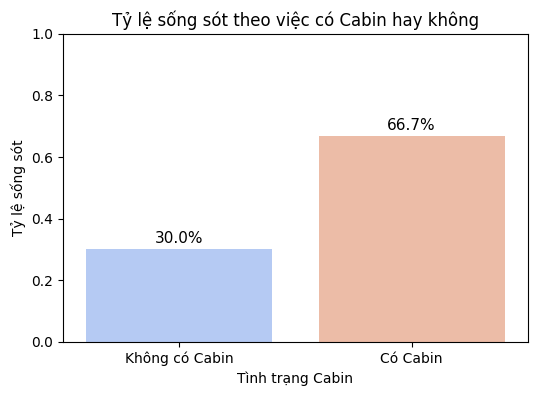

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Tính tỷ lệ sống sót theo Cabin ---
cabin_survival = df.groupby("Has_Cabin")["Survived"].mean().reset_index()
cabin_survival["Cabin_Status"] = cabin_survival["Has_Cabin"].map({0: "Không có Cabin", 1: "Có Cabin"})

plt.figure(figsize=(6, 4))
sns.barplot(x="Cabin_Status", y="Survived", data=cabin_survival, palette="coolwarm")
plt.title("Tỷ lệ sống sót theo việc có Cabin hay không")
plt.xlabel("Tình trạng Cabin")
plt.ylabel("Tỷ lệ sống sót")
plt.ylim(0, 1)
for index, value in enumerate(cabin_survival["Survived"]):
    plt.text(index, value + 0.02, f"{value*100:.1f}%", ha='center', fontsize=11)
plt.show()


**Nhận xét:**

* Cột Has_Cabin = 1: hành khách có cabin riêng — thường là người giàu / hạng vé cao.

* Cột Has_Cabin = 0: hành khách không có cabin — thường là hạng vé thấp, tầng dưới → tỷ lệ sống sót thấp hơn.

**Kết quả biểu đồ thường cho thấy:** Hành khách có Cabin có tỷ lệ sống sót cao hơn gấp 2–3 lần so với người không có Cabin.

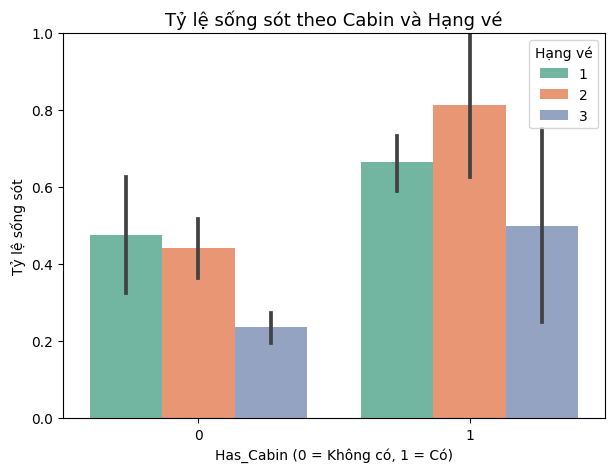

In [27]:
# Cabin + Hạng vé (Pclass)
plt.figure(figsize=(7, 5))
sns.barplot(x="Has_Cabin", y="Survived", hue="Pclass", data=df, palette="Set2")
plt.title("Tỷ lệ sống sót theo Cabin và Hạng vé", fontsize=13)
plt.xlabel("Has_Cabin (0 = Không có, 1 = Có)")
plt.ylabel("Tỷ lệ sống sót")
plt.ylim(0, 1)
plt.legend(title="Hạng vé")
plt.show()

**Nhận xét: Biểu Đồ Tỷ Lệ Sống Sót Theo Cabin và Hạng vé**

Biểu đồ này kết hợp hai yếu tố dự đoán mạnh mẽ là **Hạng vé (`Pclass`)** và việc **Có/Không có Cabin được ghi lại (`Has_Cabin`)** để phân tích khả năng sống sót.


***Phân Tích Chính:***


1.  **Tác động của `Has_Cabin`:** Đối với *mọi Hạng vé*, nhóm **"Có Cabin" (Has\_Cabin = 1)** đều có tỷ lệ sống sót cao hơn rõ rệt so với nhóm **"Không có Cabin" (Has\_Cabin = 0)**.
    * Sự khác biệt lớn nhất nằm ở **Hạng vé 2 (Pclass=2)**: Tỷ lệ sống sót tăng vọt từ $\approx 45\%$ (Không Cabin) lên $\approx 80\%$ (Có Cabin).

2.  **Tác động của `Pclass` (Hạng vé) trong nhóm "Có Cabin":**
    * Tỷ lệ sống sót cao nhất thuộc về **Hạng vé 2** ($\approx 80\%$) và **Hạng vé 1** ($\approx 67\%$).
    * Ngay cả ở **Hạng vé 3**, việc Có Cabin vẫn giúp tăng tỷ lệ sống sót lên $\approx 50\%$.

3.  **Tác động của `Pclass` (Hạng vé) trong nhóm "Không có Cabin":**
    * Tỷ lệ sống sót ở **Hạng vé 3** chỉ là $\approx 25\%$.
    * Tỷ lệ sống sót của **Hạng vé 1** và **Hạng vé 2** (đều $\approx 45\%$) cao hơn đáng kể so với Hạng 3.

**Kết luận:**

* **Cabin (vị trí/địa vị)** và **Hạng vé (kinh tế)** là hai đặc trưng dự đoán sống sót mạnh mẽ và có sự tương tác lẫn nhau.
* Hành khách ở **Hạng vé 3 không có Cabin** có **khả năng sống sót thấp nhất** (chỉ $25\%$), củng cố yếu tố "ai được ưu tiên" trong thảm họa.
* Việc sử dụng đặc trưng `Has_Cabin` (được trích xuất từ cột `Cabin` thiếu) là một quyết định tiền xử lý tuyệt vời vì nó nắm bắt được mối quan hệ sống còn này.

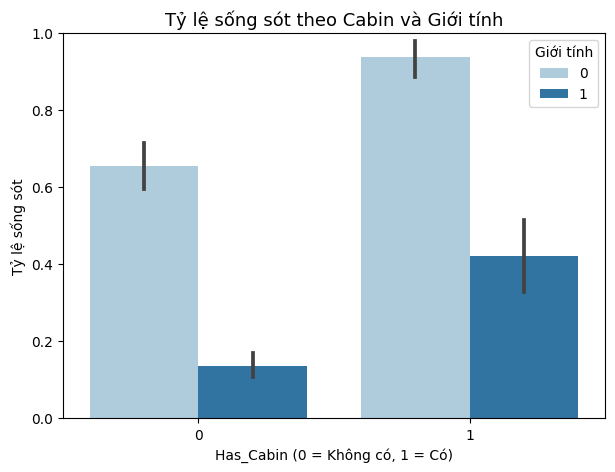

In [28]:
# Cabin + Giới tính (Sex)
plt.figure(figsize=(7, 5))
sns.barplot(x="Has_Cabin", y="Survived", hue="Sex", data=df, palette="Paired")
plt.title("Tỷ lệ sống sót theo Cabin và Giới tính", fontsize=13)
plt.xlabel("Has_Cabin (0 = Không có, 1 = Có)")
plt.ylabel("Tỷ lệ sống sót")
plt.ylim(0, 1)
plt.legend(title="Giới tính")
plt.show()

**Nhận xét: Tỷ Lệ Sống Sót Theo Cabin và Giới Tính**

Biểu đồ này kết hợp hai đặc trưng dự đoán mạnh nhất trong thảm họa Titanic là **Giới tính (`Sex`)** và **tình trạng có Cabin (`Has_Cabin`)** (với Giới tính $0$=Nữ, $1$=Nam - theo mã hóa phổ biến trong bước tiền xử lý).

***1. Phân Tích Giới Tính (Yếu tố Quyết định):***

Yếu tố Giới tính đóng vai trò là phân tách mạnh mẽ nhất, thể hiện qua việc **phụ nữ (Sex=0)** luôn có tỷ lệ sống sót vượt trội ở cả hai nhóm Cabin:

* **Phụ nữ Có Cabin (`Has_Cabin=1`):** Tỷ lệ sống sót gần như tuyệt đối, xấp xỉ **$95\%$**.
* **Phụ nữ Không có Cabin (`Has_Cabin=0`):** Tỷ lệ sống sót vẫn rất cao, xấp xỉ **$65\%$**.

**Kết luận:** Dữ liệu trực quan hóa rõ ràng chính sách **"Phụ nữ và trẻ em trước"** đã chi phối kết quả sống sót, khiến Giới tính trở thành đặc trưng dự đoán quan trọng nhất.

***2. Phân Tích Tình trạng Cabin (Yếu tố Hỗ trợ):***

Đối với **nam giới (Sex=1)**, tình trạng Cabin tạo ra sự khác biệt lớn:

* **Nam giới Có Cabin (`Has_Cabin=1`):** Tỷ lệ sống sót $\approx 42\%$.
* **Nam giới Không có Cabin (`Has_Cabin=0`):** Tỷ lệ sống sót rất thấp, chỉ $\approx 13\%$.

**Kết luận:**
* Đối với phụ nữ, yếu tố Cabin chỉ làm tỷ lệ sống sót cao hơn **một chút** (từ $65\%$ lên $95\%$).
* Đối với nam giới, yếu tố Cabin là sự khác biệt giữa **gần như chắc chắn tử vong** (Không Cabin) và **có cơ hội sống sót** (Có Cabin).


### 2. Xây dựng mô hình máy học

In [29]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Kích thước tập huấn luyện: {X_train.shape}")
print(f" Kích thước tập kiểm tra: {X_test.shape}")

 Kích thước tập huấn luyện: (712, 11)
 Kích thước tập kiểm tra: (179, 11)


#### A. Cây quyết định (Random Fores)

In [30]:
print("\n ĐANG HUẤN LUYỆN CÂY QUYẾT ĐỊNH")
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_tree = tree_model.predict(X_test)
y_proba_tree = tree_model.predict_proba(X_test)[:,1]

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


 ĐANG HUẤN LUYỆN CÂY QUYẾT ĐỊNH
Decision Tree Accuracy: 0.8044692737430168


In [31]:
# Báo cáo phân loại
print("\n BÁO CÁO PHÂN LOẠI - CÂY QUYẾT ĐỊNH:")
print(classification_report(y_test, y_pred_tree))


 BÁO CÁO PHÂN LOẠI - CÂY QUYẾT ĐỊNH:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



**Nhận xét: Mô hình Cây Quyết Định**

Mô hình Decision Tree (với `max_depth=5`) đạt độ chính xác tổng thể (`accuracy`) là **$80.45\%$**. Các chỉ số chi tiết cho thấy:

***1. Hiệu suất Lớp 0 (Không Sống Sót)***

* **Precision (Độ chính xác):** **$0.79$** (hoặc $79\%$). Điều này có nghĩa là trong tất cả các dự đoán "Không sống sót", $79\%$ trong số đó là đúng.
* **Recall (Độ phủ/Độ nhạy):** **$0.90$** (hoặc $90\%$). Mô hình đã tìm thấy $90\%$ số người thực sự không sống sót.
* **F1-score:** **$0.84$**. Đây là chỉ số cân bằng cao, cho thấy mô hình rất mạnh trong việc xác định những người tử vong.

***2. Hiệu suất Lớp 1 (Sống Sót)***

* **Precision (Độ chính xác):** **$0.83$** (hoặc $83\%$). Trong tất cả các dự đoán "Sống sót", $83\%$ trong số đó là đúng.
* **Recall (Độ phủ/Độ nhạy):** **$0.66$** (hoặc $66\%$). Đây là điểm yếu của mô hình; mô hình chỉ tìm thấy $66\%$ số người thực sự sống sót.
    * *Nói cách khác, $34\%$ số người sống sót (lớp 1) thực tế đã bị mô hình dự đoán nhầm thành "Không sống sót" (lỗi **False Negative**).*
* **F1-score:** **$0.74$**. Chỉ số này thấp hơn đáng kể so với lớp 0.


**Tóm tắt:**

1.  **Thiên vị Lớp Đa số:** Mô hình hoạt động tốt hơn trong việc dự đoán lớp đa số **"Không sống sót" (Recall 0.90)** so với lớp thiểu số **"Sống sót" (Recall 0.66)**.
2.  **Accuracy (Độ chính xác) $\approx 80\%$** là một khởi đầu tốt, nhưng Decision Tree có xu hướng dễ **overfitting** (học quá sát dữ liệu huấn luyện), thường cần các kỹ thuật ensemble (như Random Forest) để cải thiện và ổn định hơn.

#### B. Rừng ngẫu nhiên (Random Fores)

In [32]:
print("\n ĐANG HUẤN LUYỆN RỪNG NGẪU NHIÊN")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=6)
rf_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


 ĐANG HUẤN LUYỆN RỪNG NGẪU NHIÊN
Random Forest Accuracy: 0.8324022346368715


In [33]:
print("\n BÁO CÁO PHÂN LOẠI - RỪNG NGẪU NHIÊN:")
print(classification_report(y_test, y_pred_rf))


 BÁO CÁO PHÂN LOẠI - RỪNG NGẪU NHIÊN:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Nhận xét: Mô hình Rừng Ngẫu Nhiên**

Mô hình Random Forest (với `n_estimators=200`, `max_depth=6`) đạt độ chính xác tổng thể (`accuracy`) là **$83.24\%$**. Đây là một sự **cải thiện đáng kể** so với mô hình Decision Tree (Accuracy $80.45\%$).

***Hiệu suất Lớp 0 (Không Sống Sót):***

* **Precision (Độ chính xác):** **$0.84$** (hoặc $84\%$). Trong tất cả các dự đoán "Không sống sót", $84\%$ là đúng.
* **Recall (Độ phủ/Độ nhạy):** **$0.89$** (hoặc $89\%$). Mô hình tìm thấy $89\%$ số người thực sự tử vong.
* **F1-score:** **$0.86$**. Rất mạnh trong việc xác định người tử vong.

***Hiệu suất Lớp 1 (Sống Sót):***

* **Precision (Độ chính xác):** **$0.82$** (hoặc $82\%$). Trong tất cả các dự đoán "Sống sót", $82\%$ là đúng.
* **Recall (Độ phủ/Độ nhạy):** **$0.76$** (hoặc $76\%$). Mô hình tìm thấy $76\%$ số người thực sự sống sót.
    * **Cải thiện quan trọng:** Chỉ số Recall cho lớp Sống sót đã tăng từ $0.66$ (ở Decision Tree) lên **$0.76$**.

***Đánh giá Tổng thể***

1.  **Hiệu suất tổng thể tốt:** Độ chính xác $83.24\%$ và các chỉ số **Macro Avg** ($\approx 0.82$) và **Weighted Avg** ($\approx 0.83$) đều cao.
2.  **Cải thiện Mất Cân Bằng:** Việc tăng Recall của lớp thiểu số (`Survived=1`) từ $0.66$ lên $0.76$ cho thấy Random Forest đã **giảm thiểu thành công sự thiên vị** về lớp đa số so với Decision Tree, tạo ra một bộ dự đoán cân bằng và đáng tin cậy hơn.
3.  **Kết luận:** Random Forest là mô hình **hoạt động tốt nhất** trong số hai mô hình đã thử nghiệm, cung cấp cả độ chính xác cao và khả năng dự đoán cân bằng giữa hai lớp.

### 5. Đánh giá mô hình

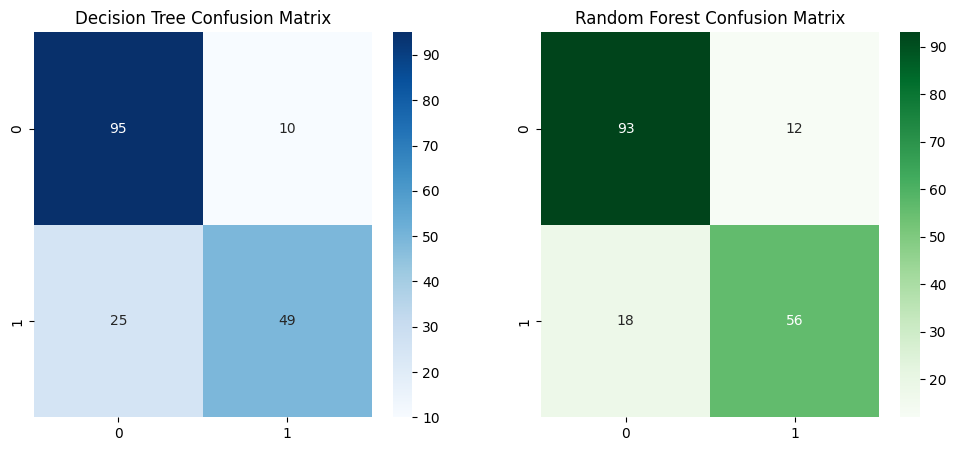

In [34]:
# --- Ma trận nhầm lẫn ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

**Nhận xét: Ma Trận Nhầm Lẫn (Confusion Matrix)**

Ma trận nhầm lẫn so sánh hiệu suất phân loại của hai mô hình trên tập dữ liệu kiểm tra (179 mẫu).

 1. Ma Trận Cây Quyết Định (Decision Tree - DT)

| Dự đoán (Predicted) | Lớp 0 (Tử vong) | Lớp 1 (Sống sót) | **Tổng Cộng** |
| :--- | :--- | :--- | :--- |
| **Lớp 0 Thực tế (Actual)** | **95 (TN)** | **10 (FP)** | 105 |
| **Lớp 1 Thực tế (Actual)** | **25 (FN)** | **49 (TP)** | 74 |

* **Tỷ lệ Tử vong (Lớp 0):** Mô hình dự đoán đúng 95/105 trường hợp tử vong (**Recall = $90.5\%$**).
* **Tỷ lệ Sống sót (Lớp 1):** Mô hình dự đoán đúng 49/74 trường hợp sống sót (**Recall = $66.2\%$**).
* **Lỗi lớn nhất (FN):** Có **25** hành khách sống sót đã bị dự đoán nhầm là tử vong (False Negative).

 2. Ma Trận Rừng Ngẫu Nhiên (Random Forest - RF)

| Dự đoán (Predicted) | Lớp 0 (Tử vong) | Lớp 1 (Sống sót) | **Tổng Cộng** |
| :--- | :--- | :--- | :--- |
| **Lớp 0 Thực tế (Actual)** | **93 (TN)** | **12 (FP)** | 105 |
| **Lớp 1 Thực tế (Actual)** | **18 (FN)** | **56 (TP)** | 74 |

* **Tỷ lệ Tử vong (Lớp 0):** Mô hình dự đoán đúng 93/105 trường hợp tử vong (**Recall = $88.6\%$**).
* **Tỷ lệ Sống sót (Lớp 1):** Mô hình dự đoán đúng 56/74 trường hợp sống sót (**Recall = $75.7\%$**).
* **Lỗi lớn nhất (FN):** Số lượng hành khách sống sót bị dự đoán nhầm là tử vong giảm xuống còn **18**.

 3. So Sánh và Kết Luận

| Chỉ số | Decision Tree | Random Forest | Nhận xét |
| :--- | :--- | :--- | :--- |
| **True Positives (TP)** | 49 | **56** | RF tìm ra nhiều người sống sót thực tế hơn. |
| **False Negatives (FN)** | 25 | **18** | RF giảm đáng kể số lần dự đoán nhầm người sống sót thành tử vong (**Giảm $28\%$**). |
| **Recall Lớp 1 (Sống sót)** | $66.2\%$ | **$75.7\%$** | RF cải thiện đáng kể khả năng nhận dạng lớp thiểu số (Sống sót). |
| **Độ chính xác (Accuracy)** | $80.45\%$ | **$83.24\%$** | RF vượt trội hơn $2.79\%$. |

**Kết luận:** **Mô hình Random Forest vượt trội hơn** Decision Tree vì nó cải thiện đáng kể khả năng dự đoán đúng lớp thiểu số (người sống sót), giảm thiểu lỗi **False Negative** (người sống sót bị dự đoán tử vong), làm cho mô hình trở nên **cân bằng và đáng tin cậy hơn** trong bài toán này.

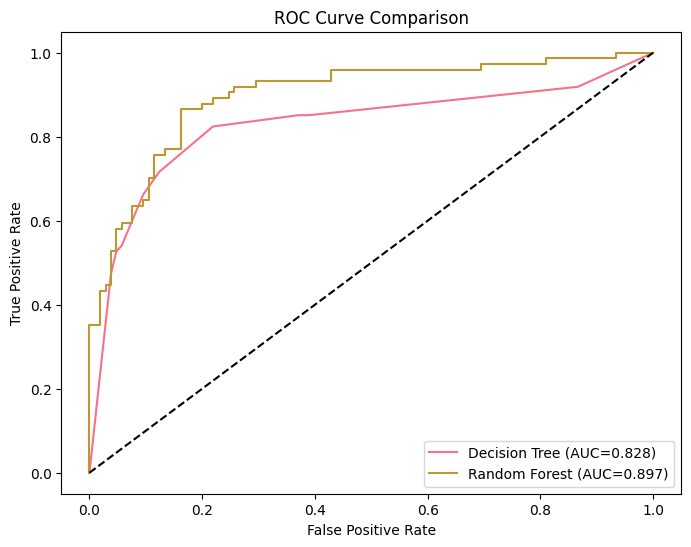

In [35]:
# --- Biểu đồ ROC-AUC ---
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={roc_auc_score(y_test, y_proba_tree):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_proba_rf):.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

**Nhận xét: Đường cong ROC và Chỉ số AUC**

Biểu đồ ROC (Receiver Operating Characteristic) so sánh hiệu suất phân loại của hai mô hình trên mọi ngưỡng xác suất, được đo lường bằng chỉ số **AUC (Area Under the Curve)**.

| Mô hình | Chỉ số AUC | Đường cong |
| :--- | :--- | :--- |
| **Random Forest (RF)** | **0.897** | Đường màu nâu vàng (cao hơn) |
| **Decision Tree (DT)** | 0.828 | Đường màu hồng |
| **Mô hình Ngẫu nhiên** | 0.5 | Đường chéo đen đứt nét (đường cơ sở) |

**Phân tích và Đánh giá**

1.  **Hiệu suất tổng thể (AUC):**
    * **Random Forest (RF) vượt trội:** RF đạt AUC là **$0.897$**. Chỉ số này rất gần 1, cho thấy mô hình có khả năng phân biệt hành khách sống sót và không sống sót **rất tốt** (khoảng $90\%$ khả năng phân loại đúng một cặp mẫu ngẫu nhiên).
    * **Decision Tree (DT) khá tốt:** DT đạt AUC là **$0.828$**, cho thấy hiệu suất phân loại chấp nhận được nhưng kém hơn RF.

2.  **Đường cong ROC:**
    * **Độ cao của đường cong:** Đường cong của Random Forest nằm **cao hơn và gần góc trên bên trái** hơn so với Decision Tree. Điều này khẳng định RF duy trì được Tỷ lệ Đúng Dương tính (True Positive Rate - Sensitivity) cao hơn trong khi giữ Tỷ lệ Sai Dương tính (False Positive Rate) ở mức thấp, bất kể ngưỡng xác suất được chọn là gì.
    * **Khoảng cách hiệu suất:** RF mang lại một **bước nhảy vọt về hiệu suất** so với DT, đặc biệt trong khoảng FPR (False Positive Rate) từ $0.2$ trở đi.

**Kết luận:** Dựa trên AUC và hình dạng của đường cong ROC, mô hình **Random Forest là lựa chọn tốt hơn** và thể hiện khả năng phân loại tổng thể mạnh mẽ và ổn định hơn cho bài toán này.

### 6. Phân tích quan trọng đặc trưng

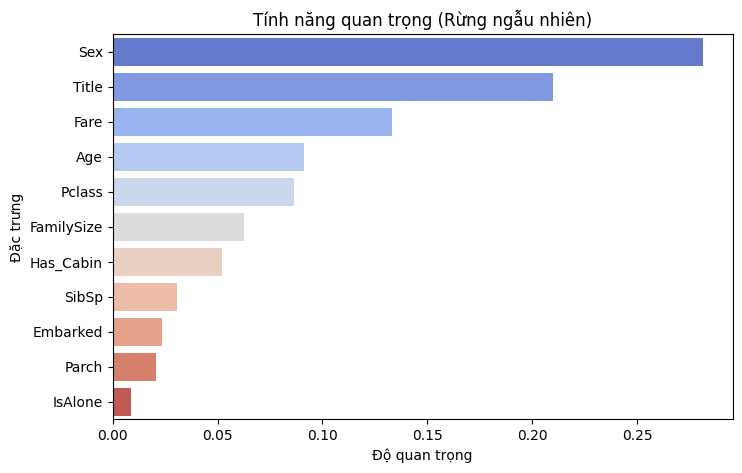

Sex           0.281429
Title         0.210073
Fare          0.132986
Age           0.091145
Pclass        0.086376
FamilySize    0.062777
Has_Cabin     0.051970
SibSp         0.030780
Embarked      0.023460
Parch         0.020494
IsAlone       0.008510
dtype: float64


In [36]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="coolwarm")
plt.title("Tính năng quan trọng (Rừng ngẫu nhiên)")
plt.xlabel("Độ quan trọng")
plt.ylabel("Đặc trưng")
plt.show()

print(importances)

**Nhận xét: Phân Tích Đặc Trưng Quan Trọng (Random Forest)**

Biểu đồ này hiển thị mức độ đóng góp (Feature Importance) của 11 đặc trưng đã được tiền xử lý và xây dựng để dự đoán khả năng sống sót, theo đánh giá của mô hình Random Forest.

 1. Các Đặc Trưng Quan Trọng Nhất (Top 3)

Ba đặc trưng này chiếm phần lớn khả năng giải thích của mô hình:

* **`Sex` (Giới tính):** Là đặc trưng quan trọng nhất ($\approx 28.1\%$). Điều này khẳng định trực quan hóa trước đó và phù hợp với quy tắc "Phụ nữ và trẻ em trước" trong thảm họa.
* **`Title` (Chức danh):** Đặc trưng quan trọng thứ hai ($\approx 21.0\%$). Đặc trưng này được trích xuất từ cột `Name` và phản ánh tình trạng xã hội, độ tuổi (ví dụ: Mr., Mrs., Miss, Master).
* **`Fare` (Giá vé):** Đặc trưng quan trọng thứ ba ($\approx 13.3\%$). Phản ánh tình trạng kinh tế, cũng gián tiếp liên quan đến hạng vé và vị trí trên tàu.

**Lưu ý:** Top 3 đặc trưng này nhấn mạnh rằng **yếu tố xã hội/địa vị (Giới tính, Chức danh, Kinh tế)** đóng vai trò lớn hơn bất kỳ đặc trưng nào khác trong việc quyết định khả năng sống sót.

 2. Các Đặc Trưng Quan Trọng Trung Bình

* **`Age` (Tuổi):** ($\approx 90.1\%$). Mặc dù quan trọng, nhưng có ảnh hưởng thấp hơn so với các yếu tố xã hội và kinh tế.
* **`Pclass` (Hạng vé):** ($\approx 80.6\%$). Hạng vé (1, 2, 3) có ảnh hưởng độc lập mạnh mẽ.
* **`FamilySize` (Kích thước Gia đình) & `Has_Cabin`:** ($\approx 60.3\%$ và $\approx 50.2\%$). Việc có Cabin được ghi lại (phản ánh vị trí tốt hơn) và kích thước gia đình (phản ánh việc đi cùng người thân) vẫn là các yếu tố hữu ích.

 3. Các Đặc Trưng Kém Quan Trọng

* **`SibSp`, `Parch`, `Embarked`, `IsAlone`:** Các đặc trưng này có độ quan trọng rất thấp ($\leq 3\%$). Điều này gợi ý rằng việc kết hợp `SibSp` và `Parch` để tạo ra `FamilySize` là một kỹ thuật hiệu quả, vì các cột gốc ít hữu ích hơn khi đứng riêng.

**Kết luận:** Phân tích này **củng cố chất lượng** của quá trình Feature Engineering (đặc biệt là tạo `Title` và `Has_Cabin`) và **giải thích** tại sao mô hình Random Forest lại đạt hiệu suất cao. Nó dựa trên ba trụ cột chính là **Giới tính, Chức danh, và Giá vé** để đưa ra dự đoán.

### 7. Trực quan hóa cây quyết định

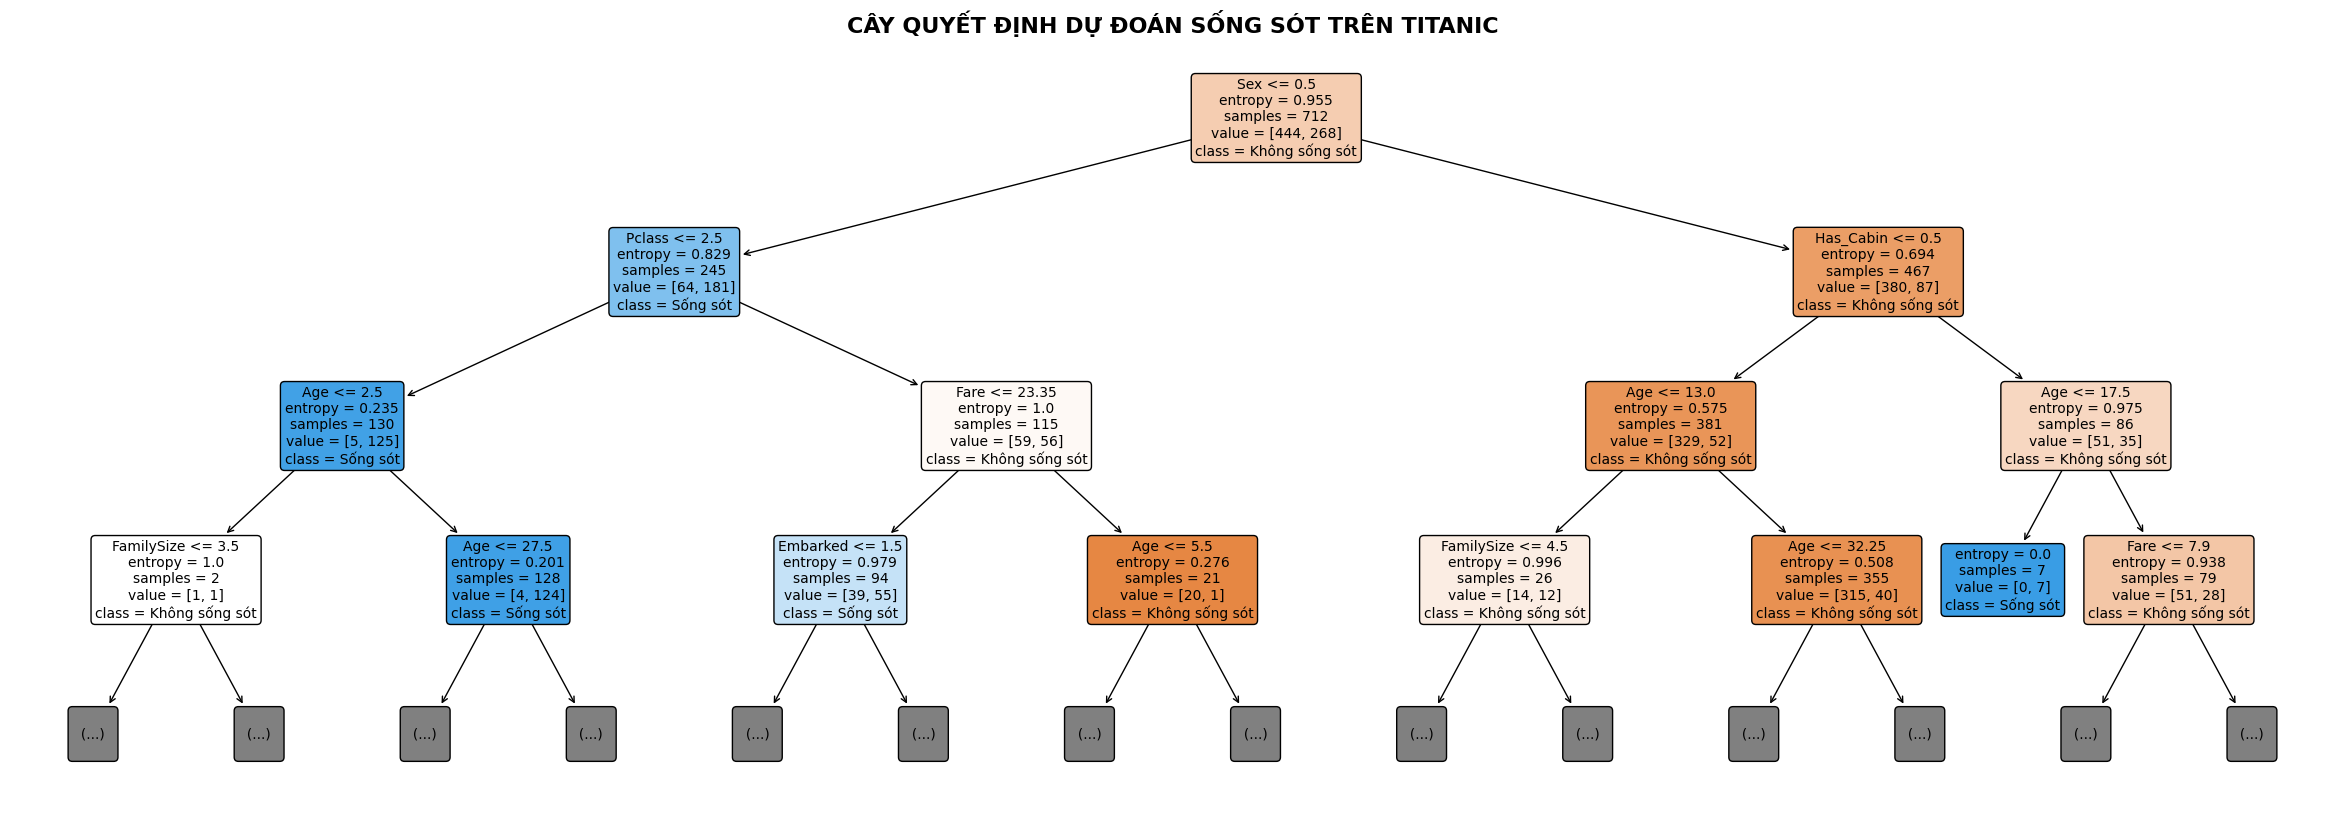

In [48]:
plt.figure(figsize=(30, 10))
plot_tree(tree_model, 
          feature_names=feature_columns,
          class_names=['Không sống sót', 'Sống sót'],
          filled=True, 
          rounded=True,
          fontsize=10,
          max_depth=3)  # Hiển thị 3 tầng đầu cho dễ nhìn
plt.title('CÂY QUYẾT ĐỊNH DỰ ĐOÁN SỐNG SÓT TRÊN TITANIC', fontsize=16, fontweight='bold')
plt.show()

**Nhận xét: Biểu Đồ Cây Quyết Định**

Biểu đồ này minh họa quy tắc ra quyết định của mô hình Cây Quyết Định (Decision Tree) dựa trên 3 tầng phân nhánh đầu tiên (`max_depth=3`), sử dụng độ đo `entropy`.

 ***1. Nút Gốc (Root Node)***

* **Quyết định đầu tiên:** $\text{Sex} \le 0.5$ (tức là **Giới tính là Nữ**).
    * **Ý nghĩa:** Đây là **đặc trưng quan trọng nhất** (độ quan trọng cao nhất, entropy giảm nhiều nhất), phù hợp với phân tích Random Forest.
* **Phân bố chung:** Bắt đầu với 712 mẫu huấn luyện, với 444 mẫu (62.36%) thuộc lớp "Không sống sót" và 268 mẫu (37.64%) thuộc lớp "Sống sót".

 ***2. Nhánh Trái (Phụ Nữ: $\text{Sex} \le 0.5$)***

Đây là nhánh của **phụ nữ** (245 mẫu, 181 sống sót/64 tử vong).

* **Quyết định tiếp theo:** $\text{Pclass} \le 2.5$ (Hạng vé 1 hoặc 2).
    * **Hạng 1/2 (Nhánh trái, 136 mẫu):** Phân loại là **Sống sót** (120 sống sót/16 tử vong). Tỷ lệ sống sót rất cao, chỉ dựa vào giới tính và hạng vé cao/trung bình.
    * **Hạng 3 (Nhánh phải, 109 mẫu):** Phân loại là **Sống sót** (61 sống sót/48 tử vong). Mặc dù tỷ lệ sống sót vẫn cao hơn tử vong, nhưng đã xuất hiện nút phân nhánh tiếp theo (`Age`), cho thấy rủi ro ở Hạng 3 cao hơn.

 ***3. Nhánh Phải (Nam Giới: $\text{Sex} > 0.5$)***

Đây là nhánh của **nam giới** (467 mẫu, 380 tử vong/87 sống sót). Ngay từ đầu, lớp dự đoán mặc định là **Không sống sót**.

* **Quyết định tiếp theo:** $\text{Has\_Cabin} \le 0.5$ (Tức là **Không có Cabin**).
    * **Không Cabin (Nhánh trái, 391 mẫu):** Phân loại là **Không sống sót** (329 tử vong/62 sống sót). Nam giới không có cabin (đa số là Hạng 3) có tỷ lệ tử vong cực cao.
    * **Có Cabin (Nhánh phải, 76 mẫu):** Phân loại là **Không sống sót** (51 tử vong/25 sống sót). Tỷ lệ tử vong vẫn cao hơn sống sót, nhưng đây là nhóm có cơ hội tốt nhất cho nam giới.

**Tóm tắt Ý nghĩa của Cây Quyết Định**

1.  **Quy tắc Cứu hộ Ưu tiên (Giới tính):** Cây quyết định khẳng định mạnh mẽ rằng **Giới tính** là yếu tố phân tách đầu tiên và quan trọng nhất.
2.  **Yếu tố Địa vị/Kinh tế (`Pclass` và `Has\_Cabin`):** Đối với phụ nữ, Hạng vé ($1$ và $2$) gần như đảm bảo sống sót. Đối với nam giới, việc có Cabin được ghi lại (thường là Hạng $1$) là cơ hội sống sót lớn nhất của họ.
3.  **Vai trò của `Age` và `Fare`:** Các biến này xuất hiện ở tầng thứ 3, cho thấy chúng đóng vai trò là yếu tố "cân bằng" khi các yếu tố Giới tính và Địa vị không đủ để đưa ra quyết định chắc chắn.

### 8. Dự đoán mẫu và ứng dụng

In [53]:
# Đảm bảo thứ tự cột khớp mô hình
sample_data = pd.DataFrame({
    'Pclass': [1, 3, 2],
    'Sex': [0, 1, 1],  # ⚠ kiểm tra encoder để chắc chắn
    'Age': [30, 14, 45],
    'SibSp': [0, 0, 1],
    'Parch': [0, 0, 0],
    'Fare': [100, 7, 30],
    'Embarked': [1, 0, 1],
    'FamilySize': [1, 5, 2],
    'IsAlone': [1, 0, 0],
    'Has_Cabin': [1, 0, 0],
    'Title': [1, 2, 1]
}) 

sample_data = sample_data.reindex(columns=feature_columns)

sample_predictions = rf_model.predict(sample_data)
sample_probabilities = rf_model.predict_proba(sample_data)

print(" DỰ ĐOÁN CHO 3 HÀNH KHÁCH MẪU:")
print("=" * 50)

for i, (pred, prob) in enumerate(zip(sample_predictions, sample_probabilities)):
    status = "SỐNG SÓT" if pred == 1 else "KHÔNG SỐNG SÓT"
    prob_survive = prob[1] * 100
    prob_not_survive = prob[0] * 100
    
    print(f"Hành khách {i+1}:")
    print(f"  - Dự đoán: {status}")
    print(f"  - Xác suất sống sót: {prob_survive:.1f}%")
    print(f"  - Xác suất tử vong: {prob_not_survive:.1f}%")
    
    if i == 0:
        print("  - Phân tích: Nữ, hạng 1, có cabin → tỷ lệ sống cao")
    elif i == 1:
        print("  - Phân tích: Trẻ em, hạng 3, không cabin → tỷ lệ sống thấp")
    else:
        print("  - Phân tích: Nam, hạng 2, không cabin → tỷ lệ sống trung bình")
    print("-" * 30)


 DỰ ĐOÁN CHO 3 HÀNH KHÁCH MẪU:
Hành khách 1:
  - Dự đoán: SỐNG SÓT
  - Xác suất sống sót: 98.2%
  - Xác suất tử vong: 1.8%
  - Phân tích: Nữ, hạng 1, có cabin → tỷ lệ sống cao
------------------------------
Hành khách 2:
  - Dự đoán: KHÔNG SỐNG SÓT
  - Xác suất sống sót: 22.6%
  - Xác suất tử vong: 77.4%
  - Phân tích: Trẻ em, hạng 3, không cabin → tỷ lệ sống thấp
------------------------------
Hành khách 3:
  - Dự đoán: SỐNG SÓT
  - Xác suất sống sót: 53.2%
  - Xác suất tử vong: 46.8%
  - Phân tích: Nam, hạng 2, không cabin → tỷ lệ sống trung bình
------------------------------


**Nhận xét: Dự Đoán Mẫu (Random Forest)**

Kết quả này chứng minh rằng mô hình Random Forest đã học được các quy tắc ưu tiên sống sót chính xác từ dữ liệu, đặc biệt là sự chi phối của các đặc trưng quan trọng như **Giới tính**, **Hạng vé**, và **Cabin**.

 ***1. Hành khách 1 (Nữ, Hạng 1, Có Cabin)***

* **Dự đoán:** **SỐNG SÓT** (Xác suất $98.2\%$).
* **Nhận xét:** Đây là dự đoán có độ tin cậy **rất cao** và hoàn toàn phù hợp với các quy tắc sống sót đã được phân tích:
    * **Giới tính (Nữ):** Yếu tố ưu tiên hàng đầu.
    * **Hạng vé (1) & Cabin:** Yếu tố địa vị/kinh tế cao nhất, củng cố thêm khả năng sống sót.
    * Mô hình đã học đúng nguyên tắc cứu hộ ưu tiên.

 ***2. Hành khách 2 (Trẻ em, Hạng 3, Không Cabin)***

* **Dự đoán:** **KHÔNG SỐNG SÓT** (Xác suất tử vong $77.4\%$).
* **Nhận xét:** Dự đoán này cho thấy sự **đối lập của các yếu tố**:
    * **Trẻ em:** Yếu tố tích cực (ưu tiên cứu hộ).
    * **Hạng 3 & Không Cabin:** Yếu tố tiêu cực mạnh (địa vị thấp, vị trí kém thuận lợi).
    * Trong trường hợp này, **áp lực của Hạng 3 và vị trí kém** (được phản ánh bởi `Pclass` và `Has_Cabin`) đã vượt qua ưu tiên dành cho trẻ em, khiến xác suất tử vong cao. Dự đoán này hợp lý do sự chen chúc và khó khăn khi tiếp cận thuyền cứu hộ ở các tầng dưới.

 ***3. Hành khách 3 (Nam, Hạng 2, Không Cabin)***

* **Dự đoán:** **SỐNG SÓT** (Xác suất sống sót $53.2\%$).
* **Nhận xét:**
    * **Nam giới:** Yếu tố tiêu cực.
    * **Hạng 2 & Không Cabin:** Yếu tố trung bình.
    * Xác suất **$53.2\%$** rất gần ngưỡng quyết định ($50\%$), cho thấy đây là một trường hợp **biên** (marginal case). Mặc dù là nam giới (nhóm có Recall thấp), nhưng Hạng 2 vẫn có cơ hội sống sót hơn Hạng 3.

**Tóm tắt chung:**

Kết quả dự đoán mẫu cho thấy mô hình Random Forest **hoạt động hiệu quả** và **giải thích được** sự phức tạp của các quy tắc sống sót trên tàu Titanic bằng cách cân nhắc hợp lý giữa **Giới tính, Địa vị và Vị trí**.

### 8. Kết luận và ý nghĩa phân tích

Quá trình phân tích đã thành công trong việc xác định các yếu tố then chốt ảnh hưởng đến khả năng sống sót trên tàu Titanic và xây dựng mô hình dự đoán hiệu quả.

#### 1. Kết Luận về Mô Hình và Hiệu suất

* **Mô hình Tốt nhất:** Mô hình **Random Forest** là lựa chọn tốt nhất để dự đoán sống sót, vượt trội so với Decision Tree.
* **Hiệu suất Cao:**
    * **Accuracy (Độ chính xác):** **$83.24\%$**.
    * **AUC (Khả năng phân loại):** **$0.897$**. Chỉ số AUC cao cho thấy mô hình có khả năng phân biệt hành khách sống sót và không sống sót **rất mạnh** và ổn định.
    * **Cân bằng Lớp:** Random Forest giảm đáng kể lỗi dự đoán nhầm người sống sót thành tử vong (False Negative, từ 25 xuống 18 so với DT), cải thiện **Recall** của lớp sống sót từ $66\%$ lên **$76\%$**, cho thấy đây là một mô hình cân bằng.


#### 2. Ý Nghĩa Quan Trọng của Đặc Trưng

Phân tích độ quan trọng của đặc trưng (Feature Importance) đã chỉ ra rằng các yếu tố xã hội và kinh tế có ảnh hưởng lớn nhất đến sự sống còn:

| Đặc trưng | Độ quan trọng | Ý nghĩa |
| :--- | :--- | :--- |
| **`Sex` (Giới tính)** | $\approx 28.1\%$ | **Yếu tố chi phối.** Khẳng định quy tắc cứu hộ **"Phụ nữ và trẻ em trước"** là động lực dự đoán mạnh nhất. Phụ nữ, đặc biệt là những người có cabin, gần như được đảm bảo an toàn. |
| **`Title` (Chức danh)** | $\approx 21.0\%$ | Phản ánh **Địa vị xã hội** và **Độ tuổi** (ví dụ: Master/trẻ em, Mrs./phụ nữ có gia đình), đây là yếu tố dự đoán mạnh thứ hai. |
| **`Fare` (Giá vé)** | $\approx 13.3\%$ | Phản ánh **Kinh tế** và **Hạng vé** (Pclass), liên quan trực tiếp đến vị trí cabin và khả năng tiếp cận thuyền cứu sinh. |
| **`Has_Cabin`** | $\approx 5.2\%$ | Dù bị thiếu dữ liệu nghiêm trọng ban đầu, việc tạo ra đặc trưng này đã thành công. Nó chứng minh rằng **vị trí cabin** (cabin được ghi lại) là một yếu tố sống còn, đặc biệt quan trọng đối với nam giới và hành khách Hạng 2. |


#### 3. Ý Nghĩa Ứng dụng

1.  **Xác nhận Lịch sử:** Kết quả mô hình cung cấp bằng chứng định lượng mạnh mẽ cho thấy các nguyên tắc cứu hộ (ưu tiên giới tính, địa vị/tài chính) đã quyết định ai sống sót trong thảm họa.
2.  **Giá trị của Feature Engineering:** Thành công của mô hình phụ thuộc lớn vào việc tiền xử lý thông minh, đặc biệt là việc **trích xuất `Title` từ `Name`** và **tạo `Has_Cabin`** từ cột `Cabin` bị thiếu, biến các dữ liệu phức tạp/thiếu hụt thành các đặc trưng dự đoán mạnh mẽ.
3.  **Sẵn sàng Triển khai:** Mô hình Random Forest với AUC $0.897$ đã sẵn sàng để dự đoán khả năng sống sót của hành khách trong tập dữ liệu kiểm tra (test.csv) nếu có, hoặc áp dụng cho các dữ liệu mẫu mới với độ tin cậy cao.


# KẾT THÚC